In [1]:
#import all necessary libraries
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from scipy.stats import kurtosis, skew

In [2]:
#import main wine dataset
winedf = pd.read_csv('wine-data/winemag-data-130k-v2.csv', index_col=0)
winedf.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
#import supplemental dataset about phenolics 
winedf1 = pd.read_csv('winequality-red.csv')
winedf1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Wordcloud?

In [4]:
!pip install wordcloud

In [5]:
# # Python program to generate WordCloud 
  
# comment_words = ' '
# stopwords = set(STOPWORDS) 
  
# # iterate through the csv file 
# for val in winedf.description: 
      
#     # typecaste each val to string 
#     val = str(val) 
  
#     # split the value 
#     tokens = val.split() 
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
          
#     for words in tokens: 
#         comment_words = comment_words + words + ' '
  
  
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(comment_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show() 

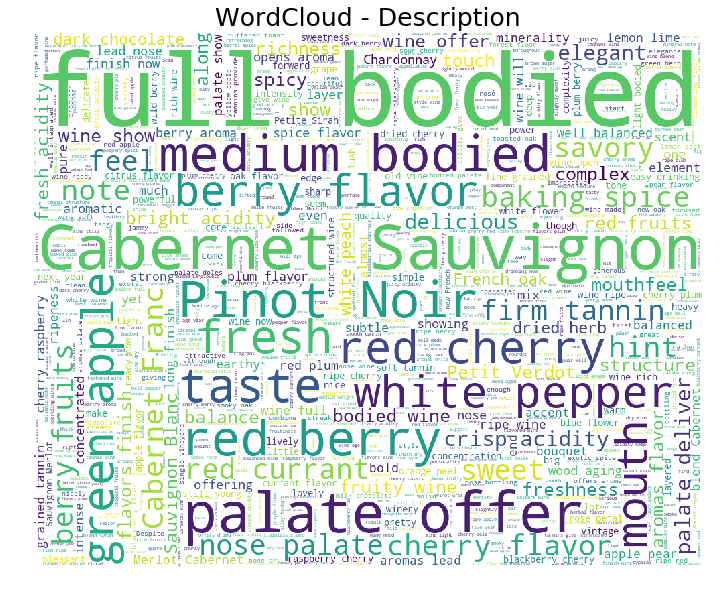

In [6]:
stopwords = set(STOPWORDS)
#Almost every review will have a "Drink" somewhere in it, and fruit/black are too common too
newStopWords = ['fruit', "Drink", "black"]

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(winedf['description'].astype(str)))

# plot the WordCloud image 
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WordCloud - Description",fontsize=25)
plt.axis('off')
plt.show()

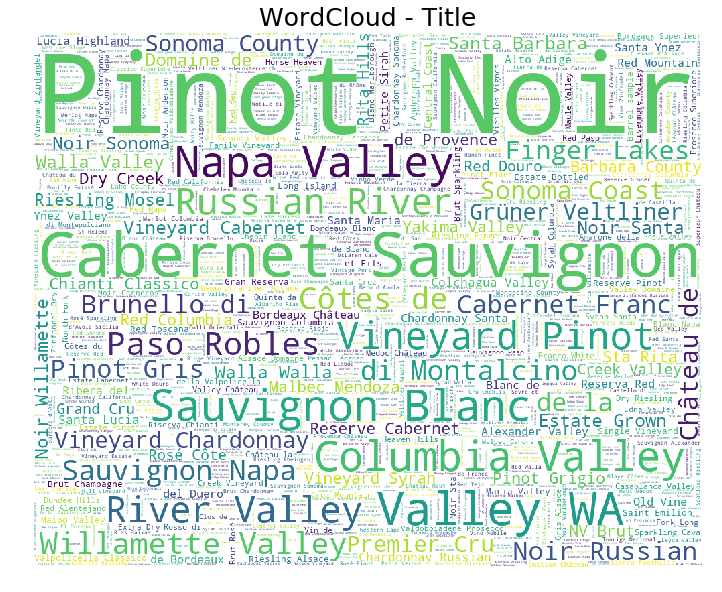

In [7]:
stopwords = set(STOPWORDS)

newStopWords = ['']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=1500,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(winedf['title'].astype(str)))

# plot the WordCloud image 
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WordCloud - Title",fontsize=25)
plt.axis('off')
plt.show()

### EDA

In [8]:
# function to investigate missing values in wine dataset 
def MissingValues(df): #creating the function
    total = df.isnull().sum().sort_values(ascending = False) # getting the sum of null values and ordering
    percent = (df.isnull().sum() / df.isnull().count() * 100 ).sort_values(ascending = False) #getting the percent and order of null
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print(df[~(df['Total'] == 0)])# Returning values of nulls different of 0
    
    return

In [9]:
MissingValues(winedf)

                       Total    Percent
region_2               79460  61.136715
designation            37465  28.825661
taster_twitter_handle  31213  24.015357
taster_name            26244  20.192197
region_1               21247  16.347493
price                   8996   6.921544
province                  63   0.048472
country                   63   0.048472
variety                    1   0.000769


In [10]:
#Empty DataFrame = no missing values
MissingValues(winedf1)

Empty DataFrame
Columns: [Total, Percent]
Index: []


#### Visualizations for clarity

Text(0, 0.5, 'Count')

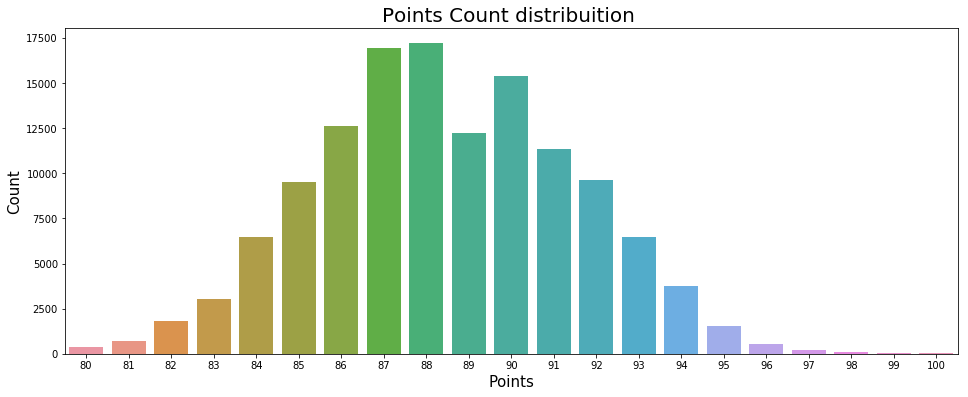

In [12]:
# define the size of figures that I will build
plt.figure(figsize=(16,6))

plt.subplot(1,1,1) 
g = sns.countplot(x='points', data=winedf) # seting the seaborn countplot to known the points distribuition
g.set_title("Points Count distribuition ", fontsize=20) # seting title and size of font
g.set_xlabel("Points", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

Text(0, 0.5, 'Count')

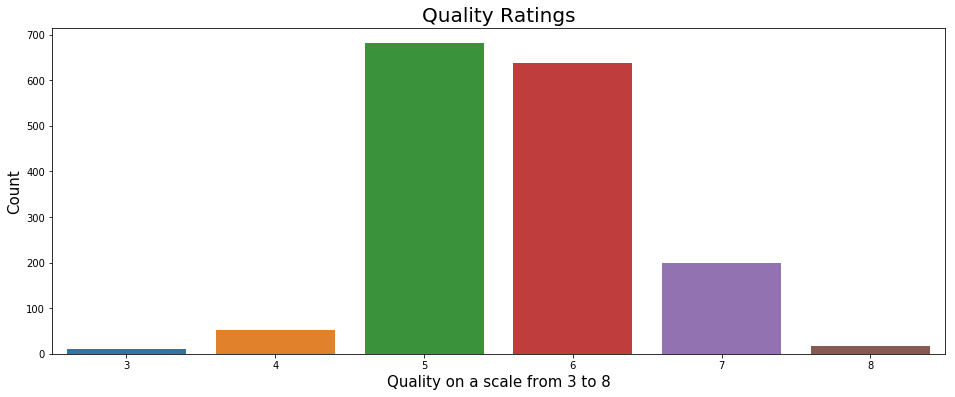

In [16]:
# This shows the best place to split on if wine is good or bad is just above 6, say 6.5
plt.figure(figsize=(16,6))

plt.subplot(1,1,1) 
g = sns.countplot(x='quality', data=winedf1) # seting the seaborn countplot to known the points distribuition
g.set_title("Quality Ratings", fontsize=20) # seting title and size of font
g.set_xlabel("Quality on a scale from 3 to 8", fontsize=15) # seting xlabel and size of font
g.set_ylabel("Count", fontsize=15) # seting ylabel and size of font

/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/flatironstudentaccount/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


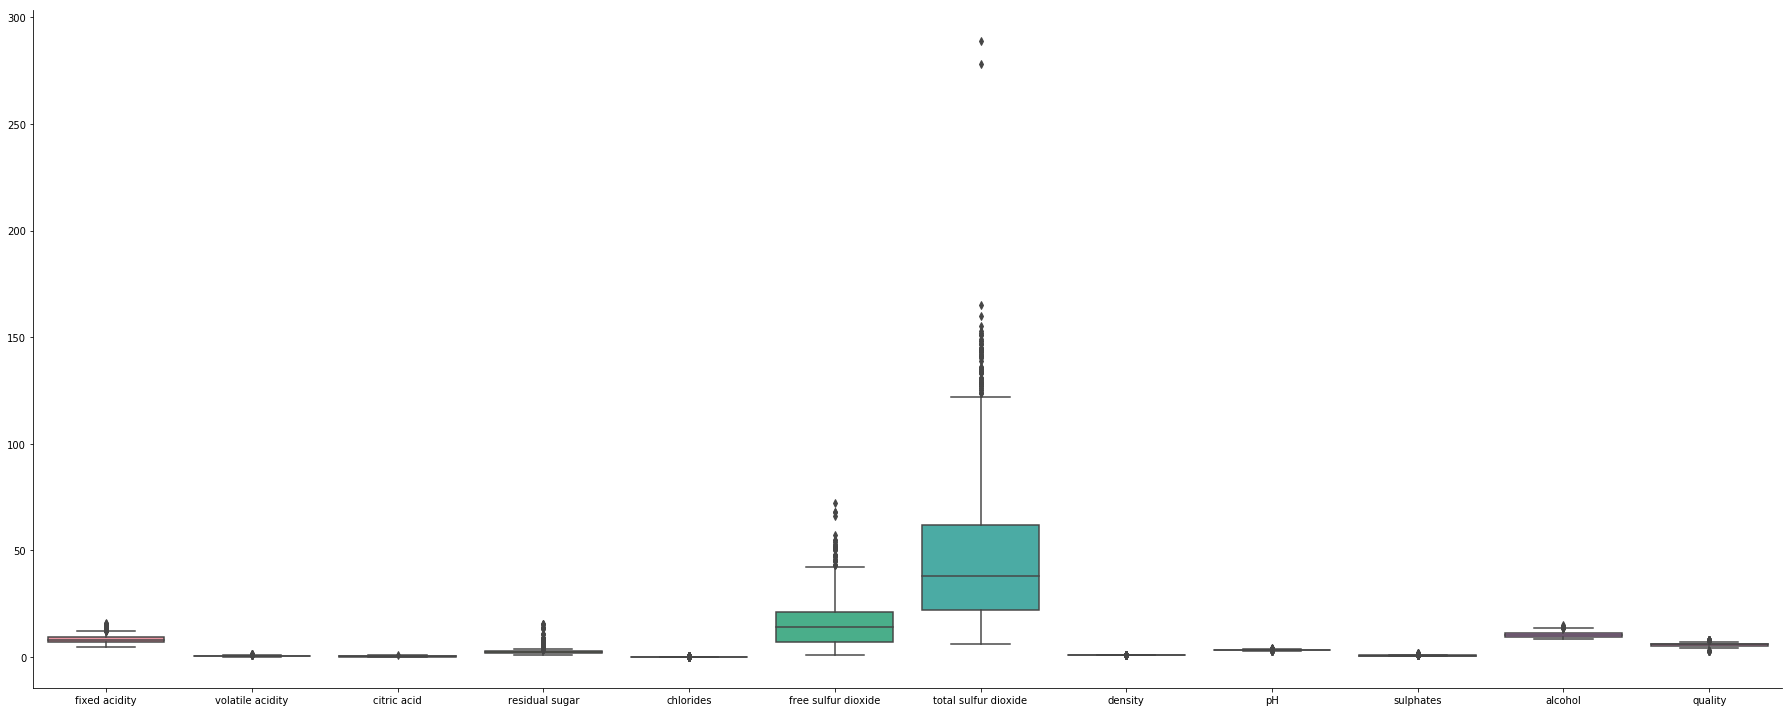

In [14]:
#fixed acidity.
sns.factorplot(data=winedf1,kind='box',size=10,aspect=2.5) # the values are distributed over a very small scale.